<a href="https://colab.research.google.com/github/Rogerio-mack/Deep-Learning-I/blob/main/MulticlassClassification_Drugs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Autor: Gabriel Ferreira Franco`

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Rogerio-mack/work/main/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
#Verificando se há valores nulos
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [4]:
df.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [5]:
#Fazendo a discretização das colunas "Sex", "BP", "Cholesterol"
coluna = ["Sex", "BP", "Cholesterol"]
for col in coluna:
  dummies = pd.get_dummies(df[col], prefix=col)
  df = pd.concat([df, dummies], axis = 1)
  df.drop(columns=[col], inplace=True)
df.head()

,Age,Na_to_K,Drug,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,DrugY,1,0,1,0,0,1,0
1,47,13.093,drugC,0,1,0,1,0,1,0
2,47,10.114,drugC,0,1,0,1,0,1,0
3,28,7.798,drugX,1,0,0,0,1,1,0
4,61,18.043,DrugY,1,0,0,1,0,1,0


In [6]:
X = scale(df.drop(columns=["Drug"]))
print(X)

[[-1.29159102  1.28652212  1.040833   ... -0.64686916  0.97043679
  -0.97043679]
 [ 0.16269866 -0.4151454  -0.96076892 ... -0.64686916  0.97043679
  -0.97043679]
 [ 0.16269866 -0.82855818 -0.96076892 ... -0.64686916  0.97043679
  -0.97043679]
 ...
 [ 0.46567567 -0.85908883 -0.96076892 ...  1.54590766  0.97043679
  -0.97043679]
 [-1.29159102 -0.28650033 -0.96076892 ...  1.54590766 -1.03046381
   1.03046381]
 [-0.26146916 -0.6571702   1.040833   ... -0.64686916 -1.03046381
   1.03046381]]


In [7]:
y = pd.get_dummies(df["Drug"])
y.head(9)

,DrugY,drugA,drugB,drugC,drugX
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,0,1
4,1,0,0,0,0
5,0,0,0,0,1
6,1,0,0,0,0
7,0,0,0,1,0
8,1,0,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [9]:
y.shape

(200, 5)

In [10]:
X.shape

(200, 9)

In [11]:
model = keras.Sequential([
    layers.Dense(20, activation='relu', input_shape=[X.shape[1]]),
    layers.Dense(15, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(y.shape[1], activation='sigmoid'),
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                200       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 5)                 55        
                                                                 
Total params: 730
Trainable params: 730
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
history = model.fit(
    X_train, y_train,
    batch_size=32,
    validation_split=0.4,
    epochs=200,
    verbose=1,  
)

Epoch 1/200
3/3 [==============================] - 1s 130ms/step - loss: 1.5074 - accuracy: 0.4643 - val_loss: 1.5133 - val_accuracy: 0.3750
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 1.4860 - accuracy: 0.4762 - val_loss: 1.4966 - val_accuracy: 0.4107
Epoch 3/200
3/3 [==============================] - 0s 15ms/step - loss: 1.4654 - accuracy: 0.5238 - val_loss: 1.4795 - val_accuracy: 0.4107
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 1.4442 - accuracy: 0.5238 - val_loss: 1.4629 - val_accuracy: 0.4464
Epoch 5/200
3/3 [==============================] - 0s 14ms/step - loss: 1.4246 - accuracy: 0.5357 - val_loss: 1.4458 - val_accuracy: 0.4464
Epoch 6/200
3/3 [==============================] - 0s 14ms/step - loss: 1.4043 - accuracy: 0.5238 - val_loss: 1.4285 - val_accuracy: 0.4286
Epoch 7/200
3/3 [==============================] - 0s 15ms/step - loss: 1.3832 - accuracy: 0.5357 - val_loss: 1.4112 - val_accuracy: 0.4286
Epoch 8/200
3/3 [==

In [15]:
def display_acc_hist(history):
  history_df = pd.DataFrame(history.history)
  display(history_df.head())
  # Start the plot at epoch 0
  history_df.loc[0:, ['loss', 'val_loss']].plot()
  history_df.loc[0:, ['accuracy', 'val_accuracy']].plot()

  print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))
  return

,loss,accuracy,val_loss,val_accuracy
0,1.507374,0.464286,1.513328,0.375000
1,1.486010,0.476190,1.496604,0.410714
2,1.465389,0.523810,1.479518,0.410714
3,1.444157,0.523810,1.462889,0.446429
4,1.424593,0.535714,1.445818,0.446429


Best Validation Loss: 0.3903
Best Validation Accuracy: 0.8571


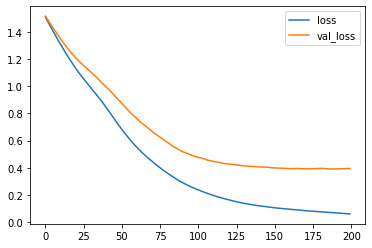

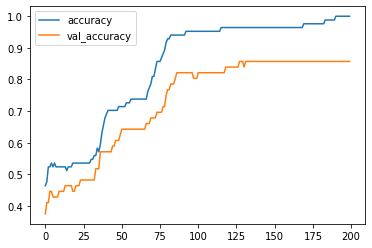

In [16]:
display_acc_hist(history)

In [17]:
model.predict(X_test)[0:5]

array([[9.9834806e-01, 8.8532424e-01, 6.4616758e-01, 7.5027943e-02,
        3.7593246e-03],
       [4.8963585e-01, 4.0673018e-03, 8.4390557e-01, 1.0508271e-04,
        9.9776089e-01],
       [8.9067417e-01, 2.6865661e-02, 7.5797403e-01, 2.1764636e-04,
        9.7826493e-01],
       [5.2507949e-01, 9.2304945e-03, 5.4270470e-01, 9.9038970e-01,
        3.6670893e-02],
       [1.0000000e+00, 8.7799311e-01, 1.2672842e-02, 1.3950089e-01,
        1.5611816e-06]], dtype=float32)

In [18]:
y_test.head(5)

,DrugY,drugA,drugB,drugC,drugX
50,1,0,0,0,0
127,0,0,0,0,1
37,0,0,0,0,1
149,0,0,0,1,0
19,1,0,0,0,0


In [19]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test = np.argmax(y_test.values, axis=1)


def print_results(y_test, y_pred):
  print('Matriz de Confusão: \n' , confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  print('Acuracidade: ' , accuracy_score(y_test, y_pred))
  return
  
print_results(y_test, y_pred)

Matriz de Confusão: 
 [[30  0  0  1  1]
 [ 0  3  3  0  0]
 [ 1  1  3  0  1]
 [ 0  0  0  4  0]
 [ 0  0  0  0 12]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.75      0.50      0.60         6
           2       0.50      0.50      0.50         6
           3       0.80      1.00      0.89         4
           4       0.86      1.00      0.92        12

    accuracy                           0.87        60
   macro avg       0.77      0.79      0.77        60
weighted avg       0.87      0.87      0.86        60

Acuracidade:  0.8666666666666667
